In [1]:
import json
import os

# Navigate to the parent directory and load the results file
results_path = os.path.join("..", "results", "iscan_20251003_142829", "iscan_morpho_mnist.json")

with open(results_path, 'r') as f:
    results = json.load(f)

print("Loaded ISCAN Morpho-MNIST results:")
print(f"Dataset info: {results['dataset_info']}")
print(f"Model: {results['model']}")
print(f"Device: {results['device']}")
print(f"Number of detected shifted nodes: {len(results['iscan']['detected_shifted_nodes'])}")


Loaded ISCAN Morpho-MNIST results:
Dataset info: {'dataset_type': 'morpho_mnist', 'data_shapes': {'env1': [311, 403], 'env2': [319, 403], 'adj': [403, 403]}}
Model: iscan
Device: cuda:0
Number of detected shifted nodes: 391


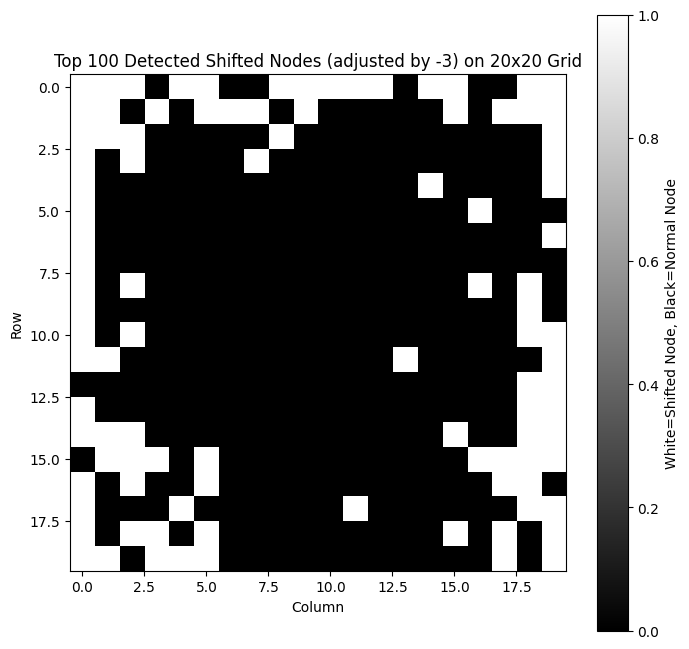

Original detected nodes count: 391
Top 100 adjusted nodes: [379, 239, 41, 1, 42, 320, 0, 180, 260, 21, 23, 340, 140, 40, 218, 19, 279, 381, 258, 15, 2, 298, 8, 384, 20, 198, 18, 220, 344, 160, 39, 4, 9, 219, 38, 302, 5, 139, 399, 26, 14, 37, 29, 363, 200, 59, 383, 80, 60, 317, 299, 301, 337, 303, 99, 319, 359, 318, 221, 259, 25, 100, 365, 120, 162, 12, 316, -3, 280, 27, 377, 380, 397, 385, 11, 10, 233, 35, 360, 362, 281, 295, 62, 178, 305, 176, 282, 116, 278, 375, 338, 358, 325, 351, 202, 67, 94, 48, 79, 322]


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Get detected shifted nodes and subtract 3 from each
detected_nodes = results['iscan']['detected_shifted_nodes']
adjusted_nodes = [node - 3 for node in detected_nodes]

# Take top 100 nodes
top_100_nodes = adjusted_nodes[:100]

# Create 20x20 grid (400 total positions)
grid = np.zeros((20, 20))

# Mark top 100 positions as white (1), rest remain black (0)
for node in top_100_nodes:
    if 0 <= node < 400:  # Ensure node is within valid range
        row = node // 20
        col = node % 20
        grid[row, col] = 1

# Visualize the grid
plt.figure(figsize=(8, 8))
plt.imshow(grid, cmap='gray', interpolation='nearest')
plt.title('Top 100 Detected Shifted Nodes (adjusted by -3) on 20x20 Grid')
plt.xlabel('Column')
plt.ylabel('Row')
plt.colorbar(label='White=Shifted Node, Black=Normal Node')
plt.show()

print(f"Original detected nodes count: {len(detected_nodes)}")
print(f"Top 100 adjusted nodes: {top_100_nodes}")